In [1]:
import os
import csv
import numpy as np
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

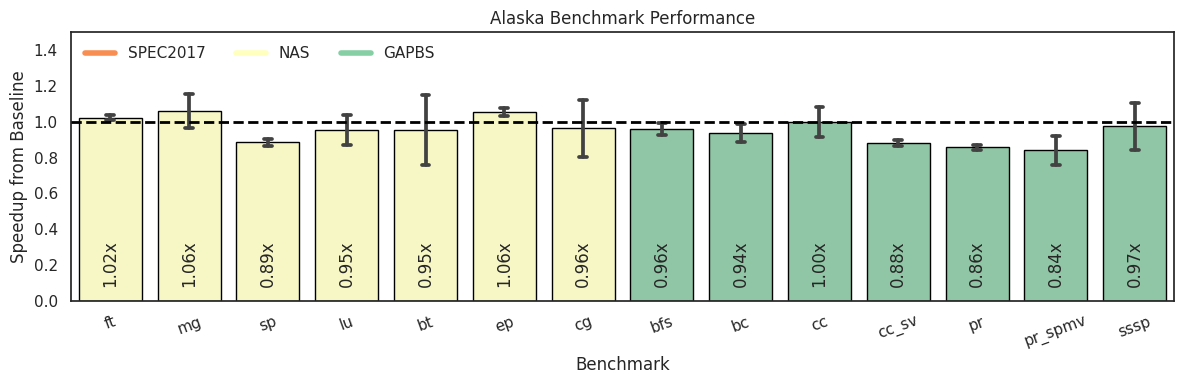

In [20]:
mpl.rcParams['hatch.linewidth']  = 0.5
sns.set_theme(style="white", palette=None)


# colors = cm.viridis(np.linspace(0.5, 0.9, 2))

df = pd.read_csv('../bench/speedup.csv')
df['slowdown'] = 1 / df['speedup']
dfg = pd.DataFrame(df.groupby('benchmark')['speedup'].mean())


f, ax = plt.subplots(1, figsize=(12, 4))
# display(df)


suites = ['SPEC2017', 'NAS', 'GAPBS']

colors = sns.color_palette("Spectral", len(suites))
suite_colors = {s: colors[i] for i, s in enumerate(suites)}

colors = {}
for index, row in df.iterrows():
    colors[row['benchmark']] = suite_colors[row['suite']]

ax.axhline(1, ls='--', zorder=13, color='black', linewidth=2)

g = sns.barplot(data=df, x="benchmark", y="speedup",
    errorbar="sd",
    linewidth=1,
    edgecolor='black',
    capsize=0.1,
    palette=colors,
    ax=ax)
#     zorder=10)

custom_lines = [Line2D([0], [0], color=c, lw=4) for c in suite_colors.values()]

g.set(title='Alaska Benchmark Performance')
g.set(xlabel='Benchmark')
g.set(ylabel='Speedup from Baseline')
g.set(ylim=(0, 1.5))

for patch in g.patches:
#     print(patch)
    g.annotate(f'{patch.get_height():.2f}x', (patch.get_x() + patch.get_width() / 2., 0),
                   ha = 'center', va = 'bottom',
                   xytext = (0, 10), rotation=90,
                   textcoords = 'offset points',zorder=11)
    
ax.legend(custom_lines, [c for c in suite_colors],
          loc='upper left',
          frameon=False,
          ncols=len(suite_colors))

plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('bench.pdf')